# Homework 09

In this exercise, you will demonstrate your learning of prediction, including regression and classification, using the [scikit-learn library](https://scikit-learn.org/stable/index.html). Note that scikit-learn is included in the Anaconda distribution, so you should not need to install anything new to use it.

Show your work (code or otherwise) and/or briefly explain your answers. In general you will not receive full credit for numeric answers with no accompanying work or justification (math, code, explanation). For numeric answers, we will round your answer to at most the nearest 0.001, depending on the number.

When you finish please go to Kernel --> Restart and Run All, and then double check that your notebook looks correct before submitting your .ipynb file (the notebook file) on gradescope.

In [1]:
# Run this code cell to import relevant libraries

import numpy as np
import pandas as pd
import seaborn as sns

### Question 1
Below we import the `tips` dataset containing information from several meals in a particular restaurant. We preview the first few rows.

In [2]:
# Run but do not modify this code

tips = sns.load_dataset("tips")
print(tips.shape)
tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


We are interested in modeling `tip` as a function of `total_bill` and `size`. Use scikit-learn to perform linear regression to model `tip` as a function of `total_bill` and `size`. Once you have fit the model, obtain the model predictions and compare them to the real `tip`. Compute both the MSE (mean squared error) and the r^2 score (the square of Pearson's correlation coefficient). Report the MSE in `q1_mse` and r^2 score in `q1_r2`, both are float/np.float.

Details:
- We import the relevant code from `sklearn` for you; you can find the documentation of the functions by searching the [scikit-learn library](https://scikit-learn.org/stable/index.html).
- You do not need to split the data into train/test sets for this problem, you can just use the whole dataset.
- You can use the default LinearRegression model, i.e., you do not need to pass any parameters to the constructor.

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Write your code for question 1 here
# and store your results in the correct variable names for full credit
linmodel = LinearRegression()
data=tips[['total_bill','size']].values
target=tips['tip'].values
linmodel.fit(data,target)


q1_mse = mean_squared_error(target,linmodel.predict(data))
q1_r2 = r2_score(target,linmodel.predict(data))


# Leave this line here to print the result
print("MSE:", q1_mse, "r^2:", q1_r2)

MSE: 1.014564905610028 r^2: 0.46786930879612587


### Question 2
Below we import and preview the `penguins` dataset. We have previously modeled the numerical `flipper_length_mm` feature. In this question, we will model the categorical `species` feature.

In [12]:
# Run but do not modify this code
# Only 11 penguins out of over 300 are missing any data;
# we simply drop those here
penguins = sns.load_dataset("penguins").dropna()
print(penguins.shape)
penguins.head()

(333, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


To begin, we hold out 70% of the data randomly as a test set.

In [40]:
# Run but do not modify this code

from sklearn.model_selection import train_test_split

q2_data = penguins.drop(columns=["species"])
q2_target = penguins["species"]
q2_train_data, q2_test_data, q2_train_target, q2_test_target = train_test_split(
    q2_data, q2_target, test_size=0.7, random_state=216)

Now, create and fit a logistic regression model to predict the `species` of a penguin using all of the other features in the dataset.  Note that two of the features, `island` and `sex` are categorical. Use a one hot encoding to encode these categorical features in your model and combine them with the numerical features. You should fit your model only on `q2_train_data` and `q2_train_target`.

Once you have fit your logistic regression model, make predictions for `q2_test_data` and then compute and report the `accuracy_score` of your predictions versus `q2_test_target`, put it in `q2_score` as `float`/`numpy.float64`. Also plot the confusion matrix for your predictions. Which `species` is most difficult for our model to classify? That is, for which `species` of penguin does our model make the most errors in its predictions on the test data? Put your answer in the cell under "Answer 2".

Details:
- We import the relevant code from `sklearn` for you; you can find the documentation of the functions by searching the [scikit-learn library](https://scikit-learn.org/stable/index.html).
- If you use the default LogisticRegression model, you may get a warning message about convergence during fitting. We recommend that you set the parameter `max_iter=1000` when calling the constructor for your model (i.e., `LogisticRegression(max_iter=1000)`. This will allow the optimization code for the model to converge.

accuracy: 0.9829059829059829


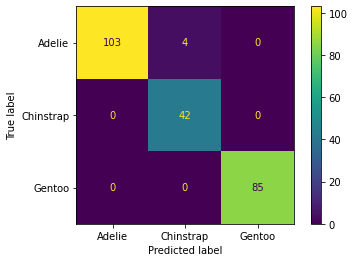

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt # just to format confusion matrix

cat_variables = OneHotEncoder().fit_transform(q2_train_data[['island','sex']]).toarray()
num_variables = q2_train_data.drop(columns=['island','sex'])
q2_train_data_encoded = np.append(cat_variables,num_variables,axis=1)

testcat_variables = OneHotEncoder().fit_transform(q2_test_data[['island','sex']]).toarray()
testnum_variables = q2_test_data.drop(columns=['island','sex'])
q2_test_data_encoded = np.append(testcat_variables,testnum_variables,axis=1)

logmodel = LogisticRegression(max_iter=1000).fit(q2_train_data_encoded,q2_train_target)

q2_score = logmodel.score(q2_test_data_encoded,q2_test_target)

plot_confusion_matrix(logmodel,q2_test_data_encoded,q2_test_target)
# Leave this line here to print the result
print("accuracy:", q2_score)


#plt.grid(False)
# optionally uncomment the above line if your confusion matrix has 
# distracting white lines; it should remove them. Must come after
# your call to plot_confusion_matrix.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q2_manual
manual: true
points: 3
-->

### Answer 2

The model makes the most errors in predicting Chinstrap penguins

<!-- END QUESTION -->



### Question 3
An interesting observation about classification in the bag of words model is that the predictive model knows nothing about the semantics of the particular language. For this question, you will build a sentiment analysis model of casual social media messages in the Central Thai language. The data consist of raw text messages, each of which is labeled with a *sentiment*, either negative `neg`, neutral `neu`, positive `pos`, or question `q`. For example, a message that reads "I am happy you are my friend" might be labeled as positive whereas one that reads "It is raining right now" might be labeled as neutral. The dataset is already split into a training and test set. We first import and preview the first ten messages and their sentiment labels.

In [50]:
# Run but do not modify this code

# Training data
q3_train_text = pd.read_csv("train_text.txt", sep="\n", dtype=str, squeeze=True)
q3_train_label = pd.read_csv("train_label.txt", sep="\n", dtype=str, squeeze=True)

# Held testing data
q3_test_text = pd.read_csv("test_text.txt", sep="\n", dtype=str, squeeze=True)
q3_test_label = pd.read_csv("test_label.txt", sep="\n", dtype=str, squeeze=True)

print("Training messages:", q3_train_text[:10].values, "\n")
print("Training message labels/classes:", q3_train_label[:10].values)

Training messages: ['คะ' 'อิเหี้ยออมทำกูอยากกินเอ็มเค' '😅😅😅' 'สวัสดีวันพุธ แนน อะไรนะ'
 'ก้อนขอบพระคุณมากๆนะคร้าบ ที่มาหาก้อนและชมเชยการบริการของพนักงานอีกด้วย <3 <3'
 'เน็ตควายมากกูพูดจริงเสียดายตังค์ที่ติดตั้งเน็ตโครตห่วยยิ่งดึกๆเน็ตยิ่งห่วยตอนมาติดตั้งใหม่ๆก็ดีนานๆไปเเย่ขึ้นเรื่อยๆกากกว่าเน็ตค่ายอื่นอ่ะบอกจริงไม่สนหรอกว่าจะเป็นเด็กเเล้วเม้นด่าเเบบนี้ เเต่นี้หาตังค์จ่ายค่าเน็ตมาตลอดเหนื่อยน่ะเล่นเกมส์ไปเดี่ยวก็หายกากเกินติดตั้งโปรพิเศษ100Mเเต่พอวัดดูปล่อยไม่ถึงเท่าที่ตกลงกันไว้พอโทรไปเเจ้งก็ปล่อยมาเต็มไม่กี่วันก็เหมื่อนเดิมใบเเจ้งก็มาย้อนหลัง3เดือนทุกครั้งห่วยไปน่ะบางทีโปร100M/700 กว่าบาทเเต่คุณภาพเเย่เสียดายตังค์'
 'ปากแดงกินฟรีค่ะ 😬😬' 'เหล้าเบลล์รสชาติเหี้ยสุด จะไม่แดกอีกละ'
 '🚗💨💨 ซิ่งเป็นบางเวลา ซ่อกแซ่กได้ทุกที่ << ขับสนุก ชับมัน ใช่เลย‼️ 👍🏻👍🏻 Honda Jazz>>#Jazz Naja'
 'สนใจ ฟอจูนเนอร์ สีขาวครับ'] 

Training message labels/classes: ['neu' 'neg' 'neu' 'neu' 'neu' 'neg' 'neu' 'neg' 'neu' 'pos']


Now, create and fit a Naive Bayes model that predicts the sentiment label of a message given the raw text of the message. To do so, you will need to vectorize the messages using the `CountVectorizer` and then create a `MultinomialNB` model. Both are imported for you below; you can use default values for both. You are welcome but not required to combine the steps and use a pipeline object. Fit your model on the training data and then make predictions of the sentiment labels for the `q3_test_text`. Compute and report the `accuracy_score` of your predictions against the true `q3_test_label`, put it in `q3_score` as `float`/`numpy.float64`. Finally, plot the confusion matrix of your predictions against `q3_test_label`.

Test classification accuracy: 0.6333707444818556


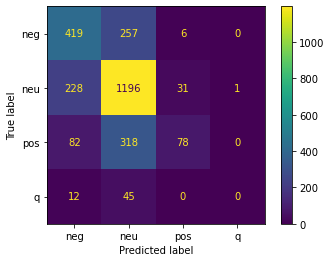

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Write your code for question 3 here
NBmodel = make_pipeline(CountVectorizer(),MultinomialNB())
NBmodel.fit(q3_train_text,q3_train_label)

q3_score = NBmodel.score(q3_test_text,q3_test_label)
plot_confusion_matrix(NBmodel,q3_test_text,q3_test_label)

# Leave this line here to print the result
print("Test classification accuracy:", q3_score)

#plt.grid(False)
# optionally uncomment the above line if your confusion matrix has 
# distracting white lines; it should remove them. Must come after
# your call to plot_confusion_matrix.

### Question 4
In addition to natural language processing, machine learning techniques for preditive modeling can be very effective for analyzing raw image data. In this question, we consider the task of modeling images of handwritten digits. We pose this as a classification task: We want to predict the digit (0, 1, 2, ..., 9) as a function of an 8 by 8 pixel grayscale image of a digit.

To begin, we import and preview the data below. `data` has 64 features, each of which is an integer between 0 and 15 corresponding to a particular pixel intensity value for one of the 64 pixels in the 8 by 8 image. `target` contains the actual digits corresponding to each particular image.

The first image corresponds to digit:  0 

First image with pixels flattened out: 
 [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.] 

First image rearranged to be 8 x 8: 
 [[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]] 

Visualizing first several images:


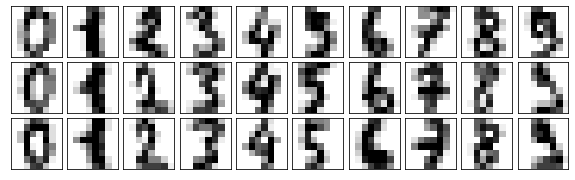

In [52]:
# Run but do not modify this code

import matplotlib.pyplot as plt

# Importing data
from sklearn.datasets import load_digits
digits = load_digits()
q4_data = digits["data"]
q4_target = digits["target"]

# Previewing data
print("The first image corresponds to digit: ", q4_target[0], "\n")
print("First image with pixels flattened out: \n", q4_data[0], "\n")
print("First image rearranged to be 8 x 8: \n", q4_data[0].reshape((8,8)), "\n")
print("Visualizing first several images:")

# Visualizing digits
fig, axes = plt.subplots(3, 10, figsize=(10, 3),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary')

We first split the data into training and test sets as usual.

In [53]:
# Run but do not modify this code

q4_train_data, q4_test_data, q4_train_target, q4_test_target = train_test_split(
    q4_data, q4_target, test_size=0.3, random_state=216)

Now, use a k-nearest neighbors classifier for your model that predicts digit given an image. We import the relevant `KNeighborsClassifier` for you below. Recall that an important hyperparameter of a k-nearest neighbor model is k, or the `n_neighbors` parameter to the `KNeighborsClassifier()` constructor. 

Use 5-fold cross validation to search for the best value of `n_neighbors` in validation on the training set from among possible values between 1 and 30. You can either do so using `cross_validate` to check each possible setting directly, or you can use a `GridSearchCV` to perform the search automatically during fitting. Report the optimal value of `n_neighbors` in `q4_n` as `int`/`numpy.int64`.

Finally, when you have fit your model with the optimal `n_neighbors` value on the training data, make predictions for the test data. Compute and report the `accuracy_score` of your model in testing and report it in `q4_score` as `float`/`numpy.float64`.

In [58]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Write your code for question 4 here  
knnmodel = GridSearchCV(estimator=KNeighborsClassifier(),
                       param_grid={'n_neighbors':range(1,31)})
knnmodel.fit(q4_train_data,q4_train_target)

q4_n = knnmodel.best_params_['n_neighbors']
q4_score = knnmodel.score(q4_test_data,q4_test_target)
# Leave this line here to print the result
print("Optimal n_neighors:", q4_n)
print("Accuracy on testing data:", q4_score)

Optimal n_neighors: 3
Accuracy on testing data: 0.987037037037037
